In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math


---
# VIDEO: Standard matrix multiplication, parts 1 & 2
---


In [30]:
## rules for multiplication validity

m = 4
n = 3
k = 6

# make some matrices
A = np.random.randn(m,n)
B = np.random.randn(n,k)
C = np.random.randn(m,k)

# test which multiplications are valid.
# Think of your answer first, then test.
np.matmul(A,B)
#np.matmul(A,A)
np.matmul(np.matrix.transpose(A),C)
np.matmul(B,np.matrix.transpose(B))
np.matmul(np.matrix.transpose(B),B)
#np.matmul(B,C)
#np.matmul(C,B)
#np.matmul(np.matrix.transpose(C),B)
np.matmul(C,np.matrix.transpose(B))

array([[ 0.4380593 , -2.37450416,  2.85166543],
       [ 1.59490291, -1.46327688, -3.85146193],
       [ 2.82077069, -0.29010478, -2.19890968],
       [-0.69531846, -0.73100731, -1.38464095]])


---
# VIDEO: Order-of-operations on matrices
---


In [3]:

n = 2
L = np.random.randn(n,n)
I = np.random.randn(n,n)
V = np.random.randn(n,n)
E = np.random.randn(n,n)

# result of "forward" multiplication and then transpose
res1 = np.matrix.transpose( L @ I @ V @ E )

# result of "flipped" multiplication of transposed matrices
res2 = np.matrix.transpose(E) @ np.matrix.transpose(V) @ np.matrix.transpose(I) @ np.matrix.transpose(L)

# test equality by subtracting (ignore possible computer rounding errors)
res1-res2

array([[  0.00000000e+00,   2.22044605e-16],
       [  0.00000000e+00,  -2.22044605e-16]])


---
# VIDEO: Matrix-vector multiplication
---


In [5]:

# number of elements
m = 4

# create matrices
N = np.round( 10*np.random.randn(m,m) )
S = np.round( np.matrix.transpose(N)*N/m**2 ) # scaled symmetric

# and vector
w = np.array([-1, 0, 1, 2])

# with symmetric matrix
# NOTE: The @ symbol for matrix multiplication is relatively new to Python
S@w    # 1
np.matrix.transpose(S@w) # 2
w@S    # 3
np.matrix.transpose(w)@np.matrix.transpose(S)  # 4
np.matrix.transpose(w)@S   # 5


# with nonsymmetric matrix
N@w    # 1
np.matrix.transpose(N@w) # 2
w@N    # 3
np.matrix.transpose(w)@np.matrix.transpose(N)  # 4
np.matrix.transpose(w)@N   # 5


array([ -6.,  -4., -19.,  22.])

In [44]:
#Coding challenge: matrix multiplication using layer method
#1. Generate two matrices
#2. Use layer method to multiply
#3. Use matrix multiplication directly
#4. Compare

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])
tot = np.array([[0,0],[0,0]])
for i in np.arange(0, x.shape[0]):
    layer = np.outer(x[:,i], y[i,:])
    print(layer)
    tot = tot + layer
print(tot)
print(x.dot(y))

[[ 5  6]
 [15 18]]
[[14 16]
 [28 32]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [60]:
#playing around
S = np.array([[3,4],[5,6]])
x = np.array([[1],[2]])
print(S)
print(x)
#x applied as weights to columns of S
print(np.matmul(S, x))
#x applied as weightws to rows of S
print(np.matmul(x.T,S))

np.matrix.transpose(x)

[[3 4]
 [5 6]]
[[1]
 [2]]
[[11]
 [17]]
[[13 16]]


array([[1, 2]])


---
# VIDEO: 2D transformation matrices
---


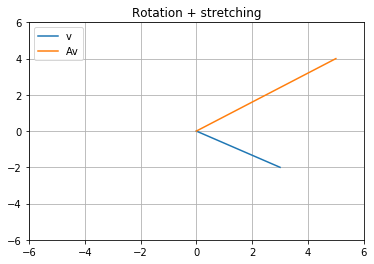

In [26]:
# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 transformation matrix
A = np.array([ [1,-1], [2,1] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-6, 6, -6, 6))
plt.legend()
plt.title('Rotation + stretching')
plt.show()

In [59]:
## pure rotation

# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 rotation matrix
th = 5*np.pi/24
A = np.array([ [math.cos(th),-math.sin(th)], [math.sin(th),math.cos(th)] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)

# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-4, 4, -4, 4))
plt.legend()
plt.title('Pure rotation')
plt.show()

SyntaxError: invalid syntax (<ipython-input-59-c326960d24e9>, line 11)


---
# VIDEO: Additive and multiplicative matrix identities
---


In [60]:
# size of matrices
n = 4

A = np.round( 10*np.random.randn(n,n) )
I = np.eye(n,n)
Z = np.zeros((n,n))

# test both identities
np.array_equal( A@I , A   )
np.array_equal( A   , A@I )
np.array_equal( A   , A+I )

np.array_equal( A   , A+I )
np.array_equal( A+Z , A@I )


True


---
# VIDEO: Additive and multiplicative symmetric matrices
---


In [86]:
## the additive method

# specify sizes
m = 5
n = 5

# create matrices
A = np.random.randn(m,n)
S = ( A + np.matrix.transpose(A) )/2

# A symmetric matrix minus its transpose should be all zeros
print( S-np.matrix.transpose(S) )


[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [96]:
## the multiplicative method

# specify sizes
m = 5
n = 3

# create matrices
A   = np.random.randn(m,n)
AtA = np.matrix.transpose(A)@A
AAt = A@np.matrix.transpose(A)

# first, show that they are square
print( AtA.shape )
print( AAt.shape )


# next, show that they are symmetric
print( AtA - np.matrix.transpose(AtA) )
print( AAt - np.matrix.transpose(AAt) )



(3, 3)
(5, 5)
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]



---
# VIDEO: Element-wise (Hadamard) multiplication
---


In [100]:
# any matrix sizes
m = 13
n =  2

# ...but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# note the different syntax compared to @ for matrix multiplication
C = np.multiply( A,B )

print(C)


[[ -7.66323146e-01  -8.25906929e-02]
 [ -3.90966578e-02   3.55398187e-01]
 [  2.56140438e-01   8.10723166e-02]
 [ -3.34874260e+00  -1.01767138e+00]
 [  1.10493988e+00   1.31099017e-01]
 [ -2.04041307e+00  -1.72216741e+00]
 [ -3.82003034e-02   6.25393221e-01]
 [ -5.75491697e-01   1.34932994e+00]
 [  1.06584279e+00  -6.19962559e-01]
 [ -3.27215150e-01   4.13362140e-02]
 [  1.86198252e-01  -1.57051310e-01]
 [ -1.91929460e-03   2.33527471e-01]
 [ -1.95764360e-01   1.84572276e-01]]


In [104]:
#coding challenge
#symmetry of combined symmetric matrices
#three methods: addition, multiplication, Hadamard multiplication
#which result in symmetric matrices?
x = np.array([[1,7],[7,1]])
y = np.array([[4,6],[6,4]])
ma = x + y
print(ma - ma.T)
#this is an edge case that does produce a symmetric matrix; usually x*y will not, even if x & y are symmetric
mm = np.matmul(x, y)
print(mm - mm.T)
mh = np.multiply(x, y)
print(mh - mh.T)

x = np.array([[1,2,3],[2,1,4],[3,4,1]])
y = np.array([[1,4,5],[4,1,6],[5,6,1]])
xy = np.matmul(x, y)
print(xy - xy.T)

[[0 0]
 [0 0]]
[[0 0]
 [0 0]]
[[46 34]
 [34 46]]
[[46 34]
 [34 46]]
[[0 0]
 [0 0]]
[[ 0 -2 -4]
 [ 2  0 -2]
 [ 4  2  0]]


In [72]:
x = np.random.randn(3,3)
x = x.T*x
y = np.random.randn(3,3)
y = y.T*y
ma = x + y
mm = np.matmul(x, y)
mh = np.multiply(x, y)
print(ma - ma.T)
print(mm - mm.T)
print(mh - mh.T)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[ 0.         -0.21943146  0.38737337]
 [ 0.21943146  0.          0.27539626]
 [-0.38737337 -0.27539626  0.        ]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [111]:
#coding challenge: standard & Hadamard multiplication for diagonal matrices
x = np.random.randn(4,4)
y = np.array([[1,0,0,0],[0,2,0,0],[0,0,5,0],[0,0,0,-1]])
print("X")
print(x)
print("X*X")
print(np.matmul(x, x))
print("X*X Hadamard")
print(np.multiply(x, x))
print("Y*Y")
print(np.matmul(y, y))
print("Y*Y Hadamard")
print(np.multiply(y,y))

X
[[ 1.2115183   0.35753284  0.28195563 -2.32270843]
 [ 0.07805201  0.77966513 -0.32478635 -1.65648225]
 [ 0.31756858 -0.07007396 -0.30016596 -0.31621703]
 [ 0.36046943  1.19104612 -0.36928733 -0.53103589]]
X*X
[[ 0.74795763 -2.07429714  0.99858595 -2.26196821]
 [-0.54483728 -1.31440382  0.47799033 -0.49043901]
 [ 0.16996088 -0.29668828  0.31917386 -0.35870277]
 [ 0.22098259  0.45088598  0.02175318 -2.41143808]]
X*X Hadamard
[[1.46777659e+00 1.27829732e-01 7.94989798e-02 5.39497444e+00]
 [6.09211612e-03 6.07877720e-01 1.05486171e-01 2.74393345e+00]
 [1.00849803e-01 4.91035931e-03 9.00996023e-02 9.99932105e-02]
 [1.29938207e-01 1.41859086e+00 1.36373135e-01 2.81999116e-01]]
Y*Y
[[ 1  0  0  0]
 [ 0  4  0  0]
 [ 0  0 25  0]
 [ 0  0  0  1]]
Y*Y Hadamard
[[ 1  0  0  0]
 [ 0  4  0  0]
 [ 0  0 25  0]
 [ 0  0  0  1]]



---
# VIDEO: Frobenius dot-product
---


In [133]:
# any matrix sizes
m = 9
n = 4

# but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# first vectorize, then vector-dot-product
Av = np.reshape( A,m*n, order='F' ) # order='F' reshapes by columns instead of by rows
Bv = np.reshape( B,m*n, order='F' )
frob_dp = np.dot( Av,Bv )

# trace method
frob_dp2 = np.trace( np.matrix.transpose(A)@B )
print(frob_dp2)
print(frob_dp)

# matrix norm
Anorm  = np.linalg.norm(A,'fro')
Anorm2 = np.sqrt( np.trace( np.matrix.transpose(A)@A ) )
print(Anorm)
print(Anorm2)

-9.04942176577
-9.04942176577
6.3470309416
6.3470309416


In [22]:
m = 3
A = np.random.randn(m, m)
A = np.matmul(A,A.T)
B = np.random.randn(m, m)
B = np.matmul(B, B.T)
np.matmul(A, B)

#multiplying two symmetric 2x2 matrices yields another symmetric matrx
#(but only if the diagonal values are all the same)
A = np.array([[1,2],[2,1]])
B = np.array([[1,3],[3,1]])
print(A)
print(B)
print(np.matmul(A, B))

#but multiplying two symmetric 3x3 matrices does not
A = np.array([[1,2,3],[2,1,4],[3,4,3]])
B = np.array([[1,3,3],[3,1,4],[3,4,3]])
print(A)
print(B)
np.matmul(A, B)

[[1 2]
 [2 1]]
[[1 3]
 [3 1]]
[[7 5]
 [5 7]]
[[1 2 3]
 [2 1 4]
 [3 4 3]]
[[1 3 3]
 [3 1 4]
 [3 4 3]]


array([[16, 17, 20],
       [17, 23, 22],
       [24, 25, 34]])